In [225]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [226]:
import pandas as pd

# Specify the file name
filename = "dog.csv"

# Read data into a DataFrame
data = pd.read_csv(filename)

# Display the DataFrame
data


,Review_Text,Sentiment
0,The dog had surgery for a tumor. Recovery expe...,Positive
1,The dog has a mild case of conjunctivitis. Rec...,Positive
2,The dog had a viral infection. Recovered fully...,Positive
3,The dog is suffering from chronic ear problems...,Negative
4,The dog had a minor surgery and is recovering ...,Positive
...,...,...
501,The treatment plan is being evaluated; decisio...,Neutral
502,The dog's recovery is progressing steadily; si...,Positive
503,Encouraging signs of improvement; the dog's he...,Positive
504,Recovery is expected soon; the dog's condition...,Positive


In [227]:
data.head()

,Review_Text,Sentiment
0,The dog had surgery for a tumor. Recovery expe...,Positive
1,The dog has a mild case of conjunctivitis. Rec...,Positive
2,The dog had a viral infection. Recovered fully...,Positive
3,The dog is suffering from chronic ear problems...,Negative
4,The dog had a minor surgery and is recovering ...,Positive


## Data Preprocessing

In [228]:
data.shape

(506, 2)

In [229]:
data.isnull().sum()

Review_Text    0
Sentiment      0
dtype: int64

In [230]:


# Remove rows with any null values
data_cleaned = data.dropna()

# Check the number of null values again to ensure they have been removed
null_counts_after = data_cleaned.isnull().sum()
print(null_counts_after)


Review_Text    0
Sentiment      0
dtype: int64


### Text Preprocessing

In [231]:
import re
import string

In [232]:
data["Review_Text"].head(5)

0    The dog had surgery for a tumor. Recovery expe...
1    The dog has a mild case of conjunctivitis. Rec...
2    The dog had a viral infection. Recovered fully...
3    The dog is suffering from chronic ear problems...
4    The dog had a minor surgery and is recovering ...
Name: Review_Text, dtype: object

convert uppercase to lowercase

In [233]:
# Ensure all entries in the 'Review_Text' column are strings
data["Review_Text"] = data["Review_Text"].astype(str)

# Apply the transformation
data["Review_Text"] = data["Review_Text"].apply(lambda x: " ".join(word.lower() for word in x.split()))



In [234]:
data["Review_Text"].head(5)

0    the dog had surgery for a tumor. recovery expe...
1    the dog has a mild case of conjunctivitis. rec...
2    the dog had a viral infection. recovered fully...
3    the dog is suffering from chronic ear problems...
4    the dog had a minor surgery and is recovering ...
Name: Review_Text, dtype: object

remove links

In [235]:
data["Review_Text"] = data['Review_Text'].apply(lambda x: " ".join(re.sub(r'^https?:\/\/.*[\r\n]*', '', x, flags=re.MULTILINE) for x in x.split()))

In [236]:
data["Review_Text"].head(5)

0    the dog had surgery for a tumor. recovery expe...
1    the dog has a mild case of conjunctivitis. rec...
2    the dog had a viral infection. recovered fully...
3    the dog is suffering from chronic ear problems...
4    the dog had a minor surgery and is recovering ...
Name: Review_Text, dtype: object

Remove punctuations

In [237]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [238]:
def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

data["Review_Text"] = data["Review_Text"].apply(remove_punctuations)

In [239]:
data["Review_Text"].tail(10)

496    the dogs health is being closely monitored upd...
497    the recovery path is unpredictable every day b...
498    the treatment approach is cautious progress is...
499    the dogs condition is stable there are no imme...
500    the recovery outlook is uncertain ongoing asse...
501    the treatment plan is being evaluated decision...
502    the dogs recovery is progressing steadily sign...
503    encouraging signs of improvement the dogs heal...
504    recovery is expected soon the dogs condition i...
505    positive feedback on the treatment the dog is ...
Name: Review_Text, dtype: object

remove numbers

In [240]:
data["Review_Text"] = data['Review_Text'].str.replace('\d+', '', regex=True)

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\Pasidhu\AppData\Local\Temp\ipykernel_12376\119659372.py:1: SyntaxWarning: invalid escape sequence '\d'
  data["Review_Text"] = data['Review_Text'].str.replace('\d+', '', regex=True)


In [241]:
data["Review_Text"].tail(10)

496    the dogs health is being closely monitored upd...
497    the recovery path is unpredictable every day b...
498    the treatment approach is cautious progress is...
499    the dogs condition is stable there are no imme...
500    the recovery outlook is uncertain ongoing asse...
501    the treatment plan is being evaluated decision...
502    the dogs recovery is progressing steadily sign...
503    encouraging signs of improvement the dogs heal...
504    recovery is expected soon the dogs condition i...
505    positive feedback on the treatment the dog is ...
Name: Review_Text, dtype: object

remove stopwords

In [242]:
!pip install nltk

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.1 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [243]:
import nltk

In [244]:

# Specify the download directory
download_dir = r'C:\Users\Pasidhu\Desktop\Dogsentiment_analysis\need'

# Download the stopwords
nltk.download('stopwords', download_dir=download_dir)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Pasidhu\Desktop\Dogsentiment_analysis\need...
[nltk_data]   Package stopwords is already up-to-date!


True

In [245]:
import os

# Path to the stopwords file
stopwords_path = os.path.join(download_dir, 'corpora', 'stopwords', 'english')

# Read the stopwords
with open(stopwords_path, 'r') as file:
    sw = file.read().splitlines()

print(sw[:10])  # Print the first 10 stopwords to verify


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]


In [246]:
data["Review_Text"] = data["Review_Text"].apply(lambda x: " ".join(x for x in x.split() if x not in sw))

In [247]:
data["Review_Text"].head()

0    dog surgery tumor recovery expected two months...
1    dog mild case conjunctivitis recovery within week
2        dog viral infection recovered fully two weeks
3    dog suffering chronic ear problems significant...
4    dog minor surgery recovering well expected ful...
Name: Review_Text, dtype: object

Stemming

In [248]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()

In [249]:
data["Review_Text"] = data["Review_Text"].apply(lambda x: " ".join(ps.stem(x) for x in x.split()))

In [250]:
data["Review_Text"].head()

0    dog surgeri tumor recoveri expect two month sh...
1          dog mild case conjunct recoveri within week
2                dog viral infect recov fulli two week
3    dog suffer chronic ear problem signific improv...
4    dog minor surgeri recov well expect full recov...
Name: Review_Text, dtype: object

In [251]:
data

,Review_Text,Sentiment
0,dog surgeri tumor recoveri expect two month sh...,Positive
1,dog mild case conjunct recoveri within week,Positive
2,dog viral infect recov fulli two week,Positive
3,dog suffer chronic ear problem signific improv...,Negative
4,dog minor surgeri recov well expect full recov...,Positive
...,...,...
501,treatment plan evalu decis made soon,Neutral
502,dog recoveri progress steadili sign posit,Positive
503,encourag sign improv dog health improv,Positive
504,recoveri expect soon dog condit stabil,Positive


### Building Vacabulary

In [252]:
from collections import Counter
vocab = Counter()

In [253]:
vocab

Counter()

In [254]:
for sentence in data['Review_Text']:
    vocab.update(sentence.split())

In [255]:
len(vocab)

315

In [256]:
tokens = [key for key in vocab if vocab[key] > 0]
len(tokens)

315

In [257]:

for token in tokens:
    print(f"Token: {token}, Count: {vocab[token]}")


Token: dog, Count: 472
Token: surgeri, Count: 56
Token: tumor, Count: 18
Token: recoveri, Count: 165
Token: expect, Count: 70
Token: two, Count: 57
Token: month, Count: 75
Token: show, Count: 37
Token: posit, Count: 47
Token: sign, Count: 57
Token: mild, Count: 45
Token: case, Count: 47
Token: conjunct, Count: 21
Token: within, Count: 47
Token: week, Count: 102
Token: viral, Count: 47
Token: infect, Count: 90
Token: recov, Count: 80
Token: fulli, Count: 64
Token: suffer, Count: 68
Token: chronic, Count: 46
Token: ear, Count: 25
Token: problem, Count: 45
Token: signific, Count: 73
Token: improv, Count: 77
Token: one, Count: 47
Token: minor, Count: 26
Token: well, Count: 61
Token: full, Count: 21
Token: bad, Count: 27
Token: reaction, Count: 29
Token: flea, Count: 17
Token: treatment, Count: 107
Token: day, Count: 28
Token: mang, Count: 12
Token: took, Count: 41
Token: three, Count: 21
Token: fine, Count: 19
Token: gastriti, Count: 12
Token: sever, Count: 60
Token: pneumonia, Count: 14
T

In [258]:
tokens = [key for key in vocab if vocab[key] > 1]

In [259]:
len(tokens)

235

In [298]:
def save_vocabulary(lines, filename):
    data = '\n'.join(lines)
    with open(filename, 'w', encoding="utf-8") as file:
        file.write(data)


# Save the tokens to the specified path
save_vocabulary(tokens, r'C:\Users\Pasidhu\Desktop\Dogsentiment_analysis\need/vocabulary1.txt')


### Divide dataset 

In [261]:
X = data['Review_Text']
y = data['Sentiment']

In [262]:

from sklearn.preprocessing import LabelEncoder
# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the target variable `y`
y_encoded = label_encoder.fit_transform(y)

# Convert `y_encoded` back to a DataFrame if necessary
data['Sentiment_encoded'] = y_encoded

# View the original labels and their encoded values
label_mapping = pd.DataFrame({
    'Original Sentiment': label_encoder.classes_,
    'Encoded Value': label_encoder.transform(label_encoder.classes_)
})

print("Label Encoding Mapping:")
label_mapping



Label Encoding Mapping:


,Original Sentiment,Encoded Value
0,Negative,0
1,Neutral,1
2,Positive,2


In [263]:
y_encoded


array([2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2,
       2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2,
       2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2,
       2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2,
       2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2,
       2, 0, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1,
       2, 0, 1, 2, 1, 2, 0, 1, 0, 1, 2, 1, 1, 1, 1, 0, 1, 2, 1, 2, 0, 1,
       2, 1, 2, 0, 1, 0, 1, 2, 2, 0, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 2, 2,
       1, 2, 1, 1, 1, 1, 2, 1, 2, 2, 1, 2, 0, 1, 2, 1, 1, 1, 1, 0, 1, 2,
       1, 2, 0, 1, 2, 1, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 0, 1, 2, 1, 2, 0, 1,
       0, 1, 2, 1, 1, 1, 1, 0, 1, 2, 1, 2, 0, 1, 2, 1, 2, 2, 1, 0, 2, 2,
       0, 2, 0, 2, 2, 0, 2, 0, 2, 0, 2, 0, 0, 2, 0,

In [264]:
!pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable


[notice] A new release of pip is available: 24.1 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [265]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y_encoded, test_size=0.2)

In [266]:
X_train

31      dog bad reaction flea treatment recov within day
53           dog mild case conjunct recoveri within week
250    dog suffer heatstrok recov fulli immedi treatm...
415             unfortun there improv dog recoveri tough
228          dog mild case conjunct recoveri within week
                             ...                        
139    dog suffer hip dysplasia recoveri expect take ...
175            dog flea tick start parasit prevent medic
494           recoveri journey challeng daybyday process
32      dog mild case mang recoveri took three week fine
402                  wow dog health improv significantli
Name: Review_Text, Length: 404, dtype: object

In [267]:
X_test

34     dog sever case pneumonia recoveri took one mon...
105          dog mild case conjunct recoveri within week
476                           dog condit worsen distress
411                        situat danger dog health good
181    dog diagnos cancer treatment option discuss owner
                             ...                        
122     dog bad reaction flea treatment recov within day
237          dog respiratori infect recov fulli two week
471                    dog health hasnt improv discourag
130    dog surgeri tumor recoveri expect two month sh...
6       dog mild case mang recoveri took three week fine
Name: Review_Text, Length: 102, dtype: object

In [268]:
y_train

array([2, 2, 2, 0, 2, 0, 1, 2, 2, 2, 1, 2, 1, 2, 0, 0, 2, 2, 2, 2, 2, 1,
       2, 1, 1, 0, 1, 1, 2, 0, 0, 2, 0, 2, 1, 2, 1, 2, 1, 0, 0, 1, 1, 2,
       2, 0, 2, 2, 2, 2, 0, 0, 0, 2, 2, 1, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2,
       0, 0, 0, 2, 0, 0, 2, 0, 0, 2, 2, 0, 0, 2, 2, 0, 1, 0, 0, 2, 0, 2,
       2, 2, 0, 0, 2, 1, 2, 2, 2, 2, 0, 2, 2, 0, 1, 2, 2, 2, 1, 2, 2, 1,
       2, 2, 2, 2, 2, 1, 0, 0, 2, 2, 0, 2, 0, 2, 2, 2, 1, 2, 0, 1, 0, 2,
       1, 0, 2, 2, 1, 0, 1, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       1, 0, 2, 2, 1, 0, 2, 0, 2, 2, 0, 2, 1, 2, 2, 2, 1, 2, 2, 0, 0, 1,
       2, 2, 2, 1, 0, 2, 0, 2, 1, 1, 2, 2, 2, 0, 2, 0, 0, 2, 0, 0, 2, 1,
       1, 0, 2, 2, 0, 2, 0, 2, 1, 1, 2, 1, 0, 2, 0, 0, 2, 2, 2, 2, 2, 2,
       1, 0, 2, 0, 0, 2, 2, 0, 2, 0, 2, 2, 2, 1, 0, 2, 2, 2, 0, 2, 2, 2,
       2, 0, 0, 0, 2, 0, 1, 2, 2, 1, 0, 2, 2, 0, 1, 2, 2, 0, 2, 0, 1, 1,
       1, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 1, 0, 2, 0, 2, 2, 2, 0, 0, 2, 2,
       0, 0, 1, 0, 1, 2, 2, 1, 2, 0, 0, 1, 1, 2, 1,

### Vectorization 

In [269]:
import numpy as np

def vectorizer(ds, vocabulary):
    vectorized_lst = []
    
    for sentence in ds:
        sentence_lst = np.zeros(len(vocabulary))
        
        for i in range(len(vocabulary)):
            if vocabulary[i] in sentence.split():
                sentence_lst[i] = 1
        
        vectorized_lst.append(sentence_lst)
    
    return np.array(vectorized_lst)

# Example usage
# Assuming `X_train` is your dataset and `tokens` is your vocabulary list
vectorized_x_train = vectorizer(X_train, tokens)
print(vectorized_x_train)


[[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]]


In [270]:
vectorized_x_train = vectorizer(X_train, tokens)

In [271]:
vectorized_x_test = vectorizer(X_test, tokens)

In [272]:
vectorized_x_train

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])

In [273]:
y_train

array([2, 2, 2, 0, 2, 0, 1, 2, 2, 2, 1, 2, 1, 2, 0, 0, 2, 2, 2, 2, 2, 1,
       2, 1, 1, 0, 1, 1, 2, 0, 0, 2, 0, 2, 1, 2, 1, 2, 1, 0, 0, 1, 1, 2,
       2, 0, 2, 2, 2, 2, 0, 0, 0, 2, 2, 1, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2,
       0, 0, 0, 2, 0, 0, 2, 0, 0, 2, 2, 0, 0, 2, 2, 0, 1, 0, 0, 2, 0, 2,
       2, 2, 0, 0, 2, 1, 2, 2, 2, 2, 0, 2, 2, 0, 1, 2, 2, 2, 1, 2, 2, 1,
       2, 2, 2, 2, 2, 1, 0, 0, 2, 2, 0, 2, 0, 2, 2, 2, 1, 2, 0, 1, 0, 2,
       1, 0, 2, 2, 1, 0, 1, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       1, 0, 2, 2, 1, 0, 2, 0, 2, 2, 0, 2, 1, 2, 2, 2, 1, 2, 2, 0, 0, 1,
       2, 2, 2, 1, 0, 2, 0, 2, 1, 1, 2, 2, 2, 0, 2, 0, 0, 2, 0, 0, 2, 1,
       1, 0, 2, 2, 0, 2, 0, 2, 1, 1, 2, 1, 0, 2, 0, 0, 2, 2, 2, 2, 2, 2,
       1, 0, 2, 0, 0, 2, 2, 0, 2, 0, 2, 2, 2, 1, 0, 2, 2, 2, 0, 2, 2, 2,
       2, 0, 0, 0, 2, 0, 1, 2, 2, 1, 0, 2, 2, 0, 1, 2, 2, 0, 2, 0, 1, 1,
       1, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 1, 0, 2, 0, 2, 2, 2, 0, 0, 2, 2,
       0, 0, 1, 0, 1, 2, 2, 1, 2, 0, 0, 1, 1, 2, 1,

In [274]:
vectorized_x_test

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])

In [275]:
y_test

array([2, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 2, 0, 2, 2, 2, 0, 0, 1, 0, 0,
       2, 0, 2, 2, 2, 1, 0, 2, 1, 1, 2, 0, 2, 0, 2, 0, 2, 0, 0, 0, 2, 1,
       1, 2, 2, 2, 2, 2, 0, 1, 2, 2, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 0, 0, 2, 1, 2, 1, 2, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2])

In [276]:
import pandas as pd

# Convert y_train to a pandas Series
y_train_series = pd.Series(y_train)

# Now you can use value_counts
print(y_train_series.value_counts())


2    208
0    124
1     72
Name: count, dtype: int64


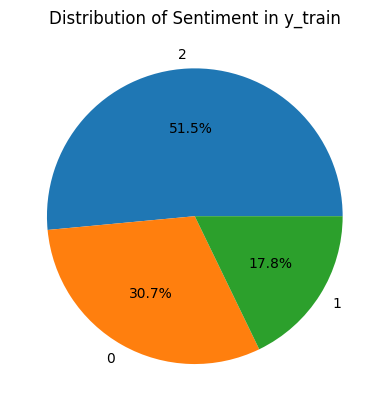

In [277]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Assuming y_train is a pandas Series
# or if y_train is a numpy array, convert it to a pandas Series
y_train_series = pd.Series(y_train)

# Count the values
value_counts = y_train_series.value_counts()

# Plotting the pie chart
plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Sentiment in y_train')
plt.show()


### Handle imbalanced dataset 

In [278]:
!pip install imbalanced-learn

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.1 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [279]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
vectorized_x_train_smote, y_train_smote = smote.fit_resample(vectorized_x_train, y_train)
print(vectorized_x_train_smote.shape, y_train_smote.shape)

(624, 235) (624,)


In [280]:
import numpy as np

# Assuming y_train_smote is a numpy array
unique, counts = np.unique(y_train_smote, return_counts=True)

# Print unique values and their counts
for label, count in zip(unique, counts):
    print(f'{label}: {count}')


0: 208
1: 208
2: 208


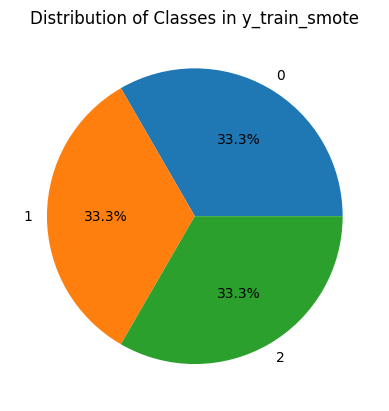

In [281]:
import numpy as np
import matplotlib.pyplot as plt
# Plotting the pie chart
plt.pie(counts, labels=unique, autopct='%1.1f%%')
plt.title('Distribution of Classes in y_train_smote')
plt.show()

In [282]:
vectorized_x_train_smote

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.]])

In [283]:
y_train_smote

array([2, 2, 2, 0, 2, 0, 1, 2, 2, 2, 1, 2, 1, 2, 0, 0, 2, 2, 2, 2, 2, 1,
       2, 1, 1, 0, 1, 1, 2, 0, 0, 2, 0, 2, 1, 2, 1, 2, 1, 0, 0, 1, 1, 2,
       2, 0, 2, 2, 2, 2, 0, 0, 0, 2, 2, 1, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2,
       0, 0, 0, 2, 0, 0, 2, 0, 0, 2, 2, 0, 0, 2, 2, 0, 1, 0, 0, 2, 0, 2,
       2, 2, 0, 0, 2, 1, 2, 2, 2, 2, 0, 2, 2, 0, 1, 2, 2, 2, 1, 2, 2, 1,
       2, 2, 2, 2, 2, 1, 0, 0, 2, 2, 0, 2, 0, 2, 2, 2, 1, 2, 0, 1, 0, 2,
       1, 0, 2, 2, 1, 0, 1, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       1, 0, 2, 2, 1, 0, 2, 0, 2, 2, 0, 2, 1, 2, 2, 2, 1, 2, 2, 0, 0, 1,
       2, 2, 2, 1, 0, 2, 0, 2, 1, 1, 2, 2, 2, 0, 2, 0, 0, 2, 0, 0, 2, 1,
       1, 0, 2, 2, 0, 2, 0, 2, 1, 1, 2, 1, 0, 2, 0, 0, 2, 2, 2, 2, 2, 2,
       1, 0, 2, 0, 0, 2, 2, 0, 2, 0, 2, 2, 2, 1, 0, 2, 2, 2, 0, 2, 2, 2,
       2, 0, 0, 0, 2, 0, 1, 2, 2, 1, 0, 2, 2, 0, 1, 2, 2, 0, 2, 0, 1, 1,
       1, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 1, 0, 2, 0, 2, 2, 2, 0, 0, 2, 2,
       0, 0, 1, 0, 1, 2, 2, 1, 2, 0, 0, 1, 1, 2, 1,

In [284]:
vectorized_x_test

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])

In [285]:
y_test

array([2, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 2, 0, 2, 2, 2, 0, 0, 1, 0, 0,
       2, 0, 2, 2, 2, 1, 0, 2, 1, 1, 2, 0, 2, 0, 2, 0, 2, 0, 0, 0, 2, 1,
       1, 2, 2, 2, 2, 2, 0, 1, 2, 2, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 0, 0, 2, 1, 2, 1, 2, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2])

## Model Training and Evaluation 

In [286]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [287]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

def training_scores(y_act, y_pred):
    acc = round(accuracy_score(y_act, y_pred), 3)
    pr = round(precision_score(y_act, y_pred), 3)
    rec = round(recall_score(y_act, y_pred), 3)
    f1 = round(f1_score(y_act, y_pred), 3)
    print(f'Training Scores:\n\tAccuracy = {acc}\n\tPrecision = {pr}\n\tRecall = {rec}\n\tF1-Score = {f1}')
    
def validation_scores(y_act, y_pred):
    acc = round(accuracy_score(y_act, y_pred), 3)
    pr = round(precision_score(y_act, y_pred), 3)
    rec = round(recall_score(y_act, y_pred), 3)
    f1 = round(f1_score(y_act, y_pred), 3)
    print(f'Testing Scores:\n\tAccuracy = {acc}\n\tPrecision = {pr}\n\tRecall = {rec}\n\tF1-Score = {f1}')

In [288]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def training_scores(y_act, y_pred):
    acc = round(accuracy_score(y_act, y_pred), 3)
    pr = round(precision_score(y_act, y_pred, average='weighted'), 3)  # Adjust average as needed
    rec = round(recall_score(y_act, y_pred, average='weighted'), 3)     # Adjust average as needed
    f1 = round(f1_score(y_act, y_pred, average='weighted'), 3)          # Adjust average as needed
    print(f"Accuracy: {acc}, Precision: {pr}, Recall: {rec}, F1-score: {f1}")

def validation_scores(y_act, y_pred):
    acc = round(accuracy_score(y_act, y_pred), 3)
    pr = round(precision_score(y_act, y_pred, average='weighted'), 3)  # Adjust average as needed
    rec = round(recall_score(y_act, y_pred, average='weighted'), 3)     # Adjust average as needed
    f1 = round(f1_score(y_act, y_pred, average='weighted'), 3)          # Adjust average as needed
    print(f"Accuracy: {acc}, Precision: {pr}, Recall: {rec}, F1-score: {f1}")



### Logistic Regression 

In [289]:
lr = LogisticRegression()
lr.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred = lr.predict(vectorized_x_train_smote)

y_test_pred = lr.predict(vectorized_x_test)

training_scores(y_train_smote, y_train_pred)

validation_scores(y_test, y_test_pred)

Accuracy: 0.995, Precision: 0.995, Recall: 0.995, F1-score: 0.995
Accuracy: 0.971, Precision: 0.971, Recall: 0.971, F1-score: 0.971


### Naive Bayes 

In [290]:
mnb = MultinomialNB()
mnb.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred = mnb.predict(vectorized_x_train_smote)

y_test_pred = mnb.predict(vectorized_x_test)

training_scores(y_train_smote, y_train_pred)

validation_scores(y_test, y_test_pred)

Accuracy: 0.931, Precision: 0.933, Recall: 0.931, F1-score: 0.931
Accuracy: 0.951, Precision: 0.951, Recall: 0.951, F1-score: 0.951


### Decision Tree 

In [291]:
dt = DecisionTreeClassifier()

dt.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred = dt.predict(vectorized_x_train_smote)

y_test_pred = dt.predict(vectorized_x_test)

training_scores(y_train_smote, y_train_pred)

validation_scores(y_test, y_test_pred)

Accuracy: 0.998, Precision: 0.998, Recall: 0.998, F1-score: 0.998
Accuracy: 0.951, Precision: 0.951, Recall: 0.951, F1-score: 0.951


### Random Forest 

In [292]:
rf = RandomForestClassifier()

rf.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred = rf.predict(vectorized_x_train_smote)

y_test_pred = rf.predict(vectorized_x_test)

training_scores(y_train_smote, y_train_pred)

validation_scores(y_test, y_test_pred)

Accuracy: 0.998, Precision: 0.998, Recall: 0.998, F1-score: 0.998
Accuracy: 0.98, Precision: 0.981, Recall: 0.98, F1-score: 0.98


### Support Vector Machine 

In [293]:
svm = SVC()

svm.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred = svm.predict(vectorized_x_train_smote)

y_test_pred = svm.predict(vectorized_x_test)

training_scores(y_train_smote, y_train_pred)

validation_scores(y_test, y_test_pred)

Accuracy: 0.995, Precision: 0.995, Recall: 0.995, F1-score: 0.995
Accuracy: 0.951, Precision: 0.951, Recall: 0.951, F1-score: 0.951


In [297]:
import pickle

with open(r'C:\Users\Pasidhu\Desktop\Final poochpaw\Function 01\Sntiment Analysis Model\model/model1.pickle', 'wb') as file:
    pickle.dump(lr, file)